In [ ]:
!curl -LJO  https://raw.githubusercontent.com/mvera1412/TA136-TB056-TB057-8625/main/data/ejs_svm.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15882  100 15882    0     0  36259      0 --:--:-- --:--:-- --:--:-- 36343


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pickle

In [ ]:
#Importo los datos

with open("ejs_svm.pkl", "rb") as f:
    data = pickle.load(f)

dataset_2 = data['2do Dataset'] # Get the '2do Dataset' dictionary
X = dataset_2['X']             # Assign the 'X' array
y = dataset_2['y']             # Assign the 'y' array

In [ ]:
svm = SVC(kernel="rbf", gamma=50, C=1)
svm.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=50)

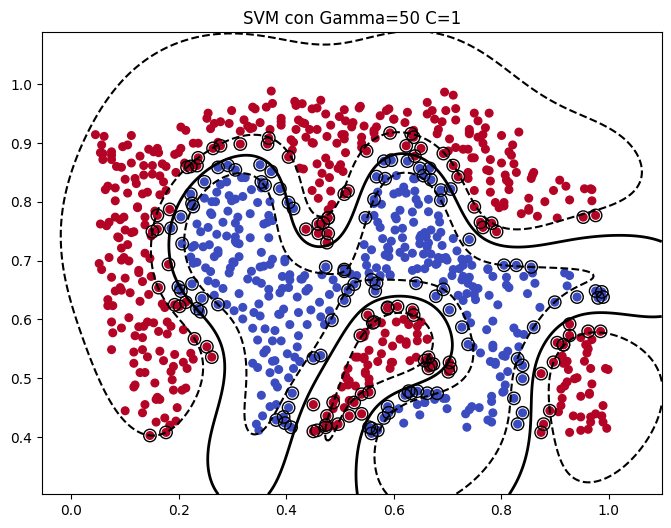

In [ ]:
#Grafico
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30)

#Grilla para la frontera
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                      np.linspace(y_min, y_max, 300))

#Prediccion
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Líneas de frontera
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="k")
#Márgenes
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles="--", colors="k")
#Vectores soporte
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=80, facecolors="none", edgecolors="k")

plt.title("SVM con Gamma=50 C=1")
plt.show()

##Variando C

El parámetro C regula la suavidad de la frontera de decisión, modificando así la cantidad de vectores de soporte usados para determinarla.

Para un C pequeño de 0.1 se observa que los márgenes de la frontera aumentan y la cantidad de vectores de soporte es alta. Se esta permitiendo más error a costa de tener una frontera más suave. Es decir C chico puede llevar a underfitting.

Por otro lado, un C grande deja márgenes más chicos con menos vectores de soporte. La frontera es más compleja y se admite menor error de entrenamiento.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


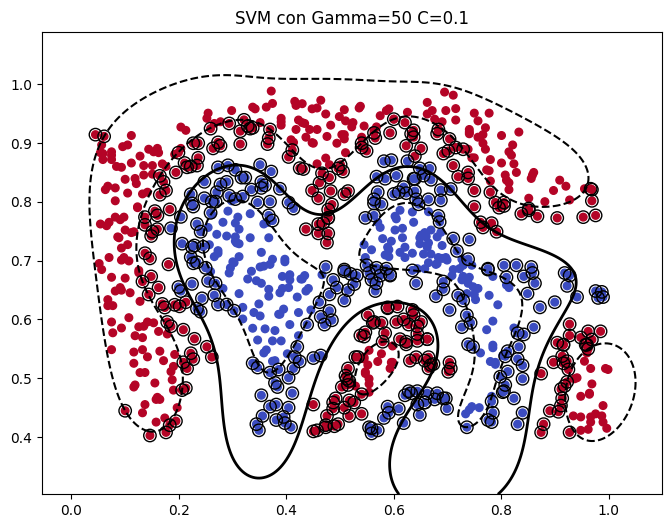

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


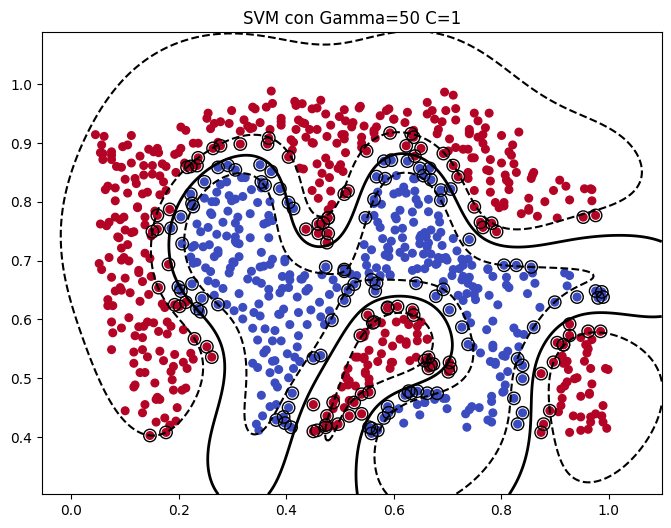

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


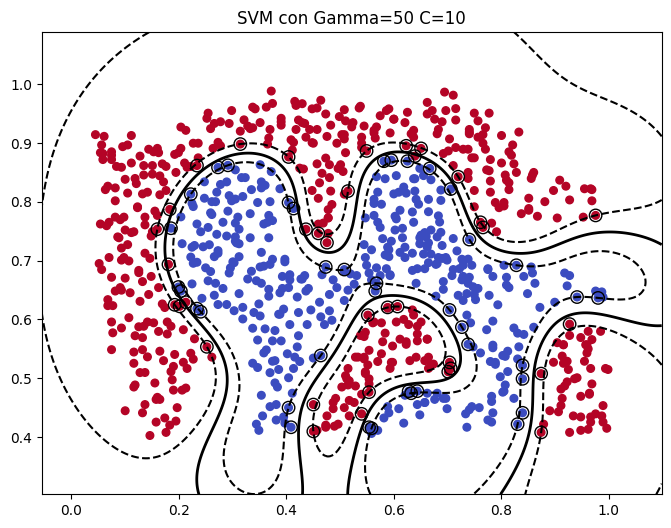

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


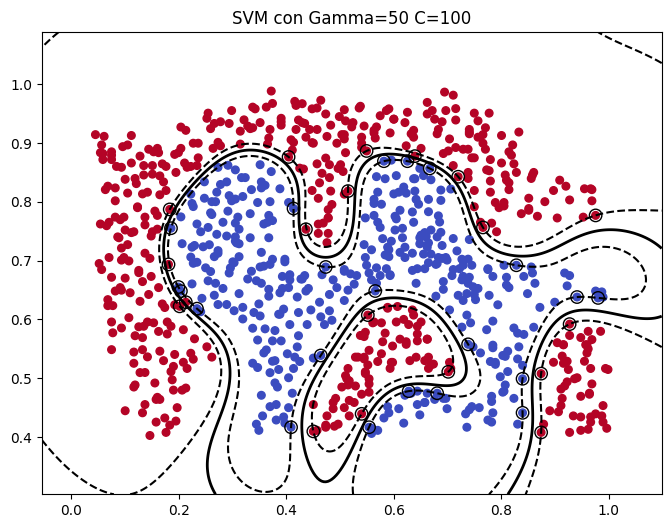

In [ ]:
Cs = [0.1, 1, 10, 100]

for C in Cs:
    model = SVC(kernel="rbf", gamma=50, C=C)
    model.fit(X, y)

    plt.figure(figsize=(8, 6))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30)

    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                          np.linspace(y_min, y_max, 300))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="k")

    plt.contour(xx, yy, Z, levels=[-1, 1], linestyles="--", colors="k")

    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=80, facecolors="none", edgecolors="k")

    plt.title(f"SVM con Gamma=50 C={C}")
    plt.show()


##Variando $\gamma$

El hiperparámetro $\gamma$ es parte del kernel Gaussiano y modifica como la frontera de decisión se ajusta a la distribución de los datos. Se puede observar como cambia la frontera variando de 0.1 a 200.

Para $\gamma$ 0.1, la frontera planteada es muy simple y el modelo está sobregeneralizado y hasta el error de entrenamiento es grande.

Al aumentar $\gamma$ la frontera es cada vez más compleja, se puede ver que para un valor de 200 la frontera sigue exactamente a los vectores de soporte, esto muestra que ahora el modelo se sobreajusta a los datos de entrenamiento y cualquier dato nuevo que alga levemente de esa distribución puede ser mal catalogado.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


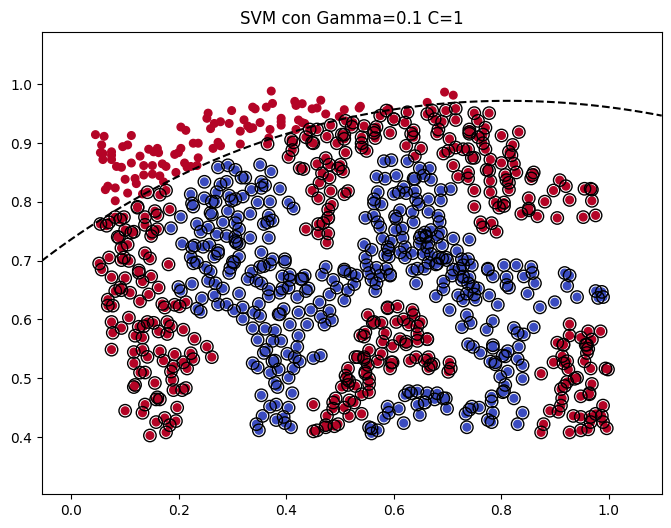

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


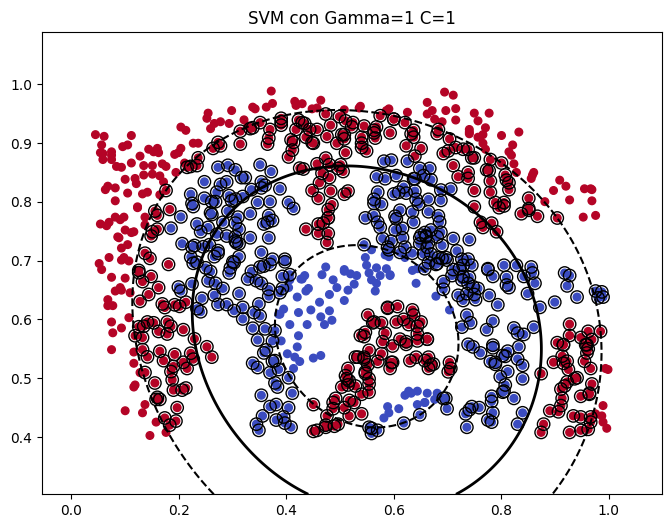

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


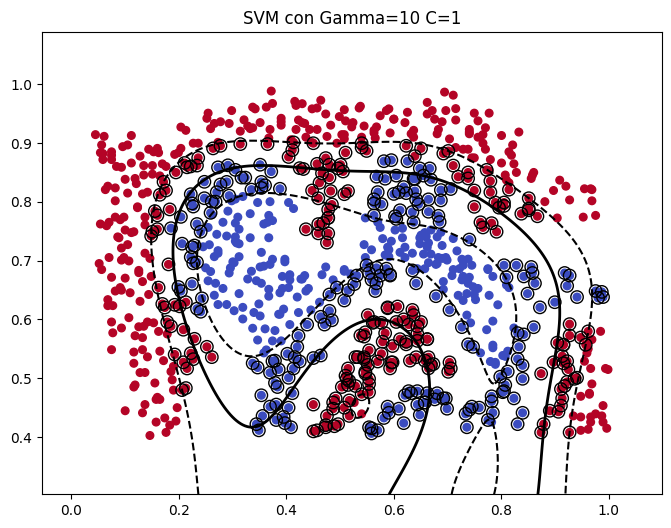

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


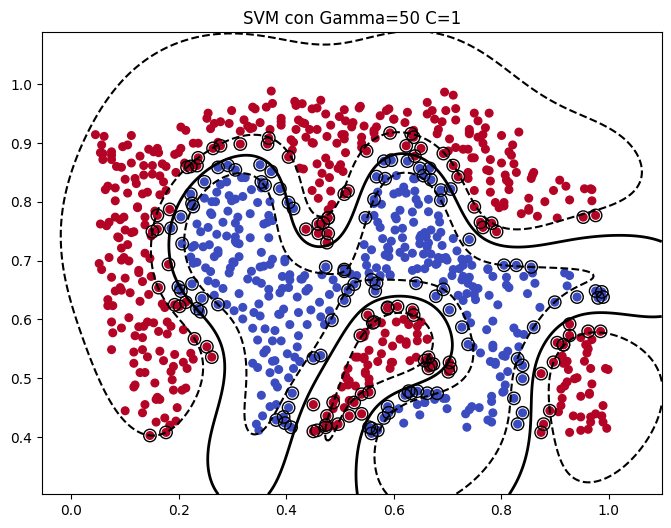

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


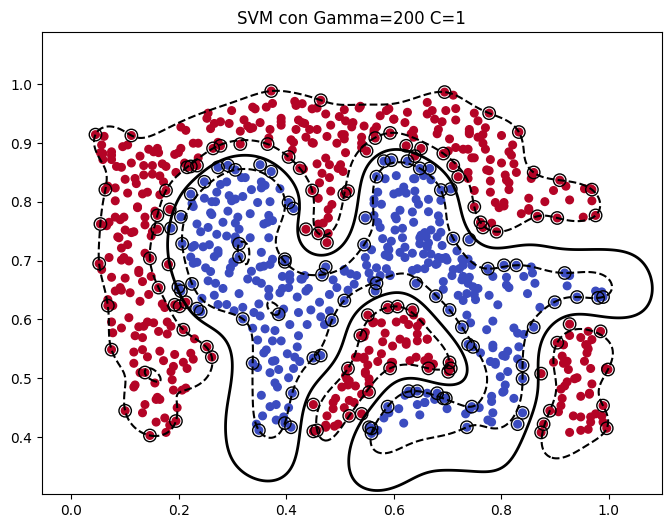

In [ ]:
gammas = [0.1, 1, 10, 50, 200]

for g in gammas:
    model = SVC(kernel="rbf", gamma=g, C=1)
    model.fit(X, y)

    plt.figure(figsize=(8, 6))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30)

    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                          np.linspace(y_min, y_max, 300))

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="k")

    plt.contour(xx, yy, Z, levels=[-1, 1], linestyles="--", colors="k")

    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=80, facecolors="none", edgecolors="k")

    plt.title(f"SVM con Gamma={g} C=1")
    plt.show()